Bibliotecas

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, GroupShuffleSplit, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [3]:
data = pd.read_csv('final_features_dataset.csv')

Agrupar nódulos por paciente e train test split com todos os nódulos do mesmo paciente no mesmo grupo

In [4]:
data['group'] = data['nodule_id'].str[10:14]
groups = data['group']
X = data.drop(['malignancy', 'nodule_id', 'group'], axis=1)
y = data['malignancy']
gss = GroupShuffleSplit(test_size=0.3, n_splits=5, random_state = 42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
print(data.head())

          nodule_id  slice_thickness  pixel_spacing  subtlety  \
0  LIDC-IDRI-0001-1             2.50       0.703125         5   
1  LIDC-IDRI-0002-1             1.25       0.681641         2   
2  LIDC-IDRI-0003-1             2.50       0.820312         5   
3  LIDC-IDRI-0003-2             2.50       0.820312         4   
4  LIDC-IDRI-0003-3             2.50       0.820312         4   

   internalStructure  calcification  sphericity  margin  lobulation  \
0                  1              6           3       4           3   
1                  1              6           5       1           1   
2                  1              6           4       3           2   
3                  1              6           3       4           1   
4                  1              6           4       5           1   

   spiculation  ...  diagnostics_Image-interpolated_Spacing_2  \
0            5  ...                                       2.0   
1            1  ...                                 

# XGBoost

Fine Tuning do XGBoost

In [8]:
param_grid = {
    'max_depth': [4, 6, 8],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8,1.0],
    'gamma': [0, 0.2, 0.4],
    'min_child_weight': [2, 3, 4]
}

xgb_classifier = xgb.XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, refit=True, cv=3, n_jobs=-1, verbose=3)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.700 total time=   1.0s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.812 total time=   1.0s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.725 total time=   0.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.729 total time=   1.5s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.875 total time=   1.5s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=100, subsample=0.6;

[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.796 total time=   2.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.817 total time=   3.0s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.863 total time=   4.0s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.787 total time=   5.3s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.817 total time=   4.1s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.6;, score=0.733 total time=   1.1s
[CV 2/3] END colsample_bytree

[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.796 total time=   1.9s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.775 total time=   1.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.804 total time=   2.3s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.871 total time=   2.9s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.787 total time=   2.7s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.817 total time=   2.7s
[CV 1/3] END colsample_bytre

[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.800 total time=   0.8s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.846 total time=   0.9s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.871 total time=   0.9s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.829 total time=   0.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.858 total time=   1.3s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.875 total time=   1.4s
[CV 3/3] END colsample_bytree=0.

[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.812 total time=   2.0s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.867 total time=   2.0s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.812 total time=   2.0s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.833 total time=   2.2s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.879 total time=   1.2s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.800 total time=   1.2s
[CV 2/3] END colsample_bytree=

[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.879 total time=   1.4s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.825 total time=   1.4s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.850 total time=   1.6s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.883 total time=   1.9s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.817 total time=   1.8s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.825 total time=   1.9s
[CV 1/3] END colsample_bytree=0.6,

[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.846 total time=   1.4s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.883 total time=   1.5s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.817 total time=   1.5s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.838 total time=   1.6s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.887 total time=   1.7s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.812 total time=   1.6s
[CV 2/3] END colsample_bytree=0.6,

[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.838 total time=   2.1s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.804 total time=   0.8s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.838 total time=   0.9s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.838 total time=   0.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.825 total time=   1.1s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.875 total time=   1.2s
[CV 3/3] END colsample_bytree=0.6, gam

[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.842 total time=   1.1s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.808 total time=   1.1s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.858 total time=   1.2s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.792 total time=   1.2s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.821 total time=   1.2s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.875 total time=   1.0s
[CV 3/3] END colsample_bytree=0.6, 

[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.887 total time=   1.3s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.800 total time=   1.3s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.838 total time=   1.4s
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.863 total time=   1.6s
[CV 3/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.842 total time=   1.5s
[CV 2/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.833 total time=   1.5s
[CV 1/3] END colsample_bytree=0.6,

[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.825 total time=   2.4s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.6;, score=0.746 total time=   0.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.6;, score=0.725 total time=   0.9s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.771 total time=   0.9s
[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.725 total time=   1.0s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.729 total time=   0.9s
[CV 1/3] END colsampl

[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.817 total time=   2.6s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.871 total time=   3.3s
[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.796 total time=   3.3s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.838 total time=   3.7s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.750 total time=   1.0s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.725 total time=   0.9s
[CV 1/3] END colsa

[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.721 total time=   1.1s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.825 total time=   1.3s
[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.721 total time=   1.4s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.825 total time=   1.6s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.875 total time=   2.0s
[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.779 total time=   1.9s
[CV 2/3] END colsam

[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.825 total time=   1.7s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.833 total time=   1.8s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.879 total time=   1.3s
[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.812 total time=   1.1s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.854 total time=   1.3s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.875 total time=   1.5s
[CV 3/3] END colsamp

[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.854 total time=   2.7s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.883 total time=   3.1s
[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.842 total time=   2.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.833 total time=   2.9s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.883 total time=   3.5s
[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.833 total time=   3.3s
[CV 2/3] END col

[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.879 total time=   0.9s
[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.825 total time=   0.9s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.867 total time=   1.0s
[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.850 total time=   0.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.842 total time=   1.3s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.875 total time=   1.8s
[CV 3/3] END colsample_byt

[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.779 total time=   1.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.833 total time=   2.1s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.887 total time=   2.4s
[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.829 total time=   2.2s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.863 total time=   0.9s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.867 total time=   1.0s
[CV 3/3] END colsample_b

[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.804 total time=   1.3s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.842 total time=   1.5s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.892 total time=   2.0s
[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.829 total time=   1.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.854 total time=   1.8s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.879 total time=   1.9s
[CV 1/3] END colsample

[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.875 total time=   1.8s
[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.821 total time=   1.7s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.833 total time=   1.2s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.887 total time=   1.5s
[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.808 total time=   1.5s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.817 total time=   1.6s
[CV 1/3] END colsample_by

[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.808 total time=   2.0s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.842 total time=   1.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.6;, score=0.842 total time=   1.0s
[CV 1/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.875 total time=   1.1s
[CV 3/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.825 total time=   0.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.846 total time=   1.1s
[CV 1/3] END colsample_byt

[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.871 total time=   2.0s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.796 total time=   1.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.817 total time=   2.5s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.871 total time=   2.5s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.796 total time=   2.8s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.842 total time=   2.8s
[CV 1/3] END col

[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.721 total time=   1.5s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.825 total time=   2.0s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.875 total time=   2.3s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.787 total time=   2.5s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.808 total time=   2.5s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.875 total time=   3.0s
[CV 3/3] END cols

[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.863 total time=   1.3s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.879 total time=   1.2s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.842 total time=   1.4s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.842 total time=   1.9s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.883 total time=   1.8s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.825 total time=   1.8s
[CV 1/3] END colsam

[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.825 total time=   3.0s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.854 total time=   3.3s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.875 total time=   4.0s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.838 total time=   3.7s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.6;, score=0.850 total time=   1.1s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.867 total time=   1.4s
[CV 3/3] END colsa

[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.871 total time=   2.4s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.829 total time=   2.2s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.842 total time=   2.7s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.875 total time=   2.6s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.808 total time=   2.3s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.846 total time=   2.8s
[CV 1/3] END col

[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.875 total time=   1.6s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.850 total time=   1.3s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.833 total time=   1.5s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.875 total time=   1.7s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.833 total time=   1.7s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.821 total time=   1.6s
[CV 1/3] END colsample_b

[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.829 total time=   1.9s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.896 total time=   1.3s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.833 total time=   1.2s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.850 total time=   1.7s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.887 total time=   1.9s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.833 total time=   1.9s
[CV 2/3] END colsample_bytr

[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.846 total time=   1.1s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.887 total time=   1.6s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.808 total time=   1.6s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.817 total time=   1.4s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.900 total time=   1.1s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.842 total time=   1.2s
[CV 2/3] END colsample

[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.833 total time=   1.4s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.875 total time=   1.8s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.808 total time=   1.5s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.842 total time=   1.4s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.879 total time=   2.1s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.771 total time=   1.7s
[CV 2/3] END colsample

[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.892 total time=   1.1s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.829 total time=   1.1s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.833 total time=   1.5s
[CV 1/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.858 total time=   1.5s
[CV 3/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.808 total time=   1.5s
[CV 2/3] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.829 total time=   1.4s
[CV 1/3] END colsample_by

[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.796 total time=   3.8s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.825 total time=   3.8s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.754 total time=   2.8s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.742 total time=   1.7s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.821 total time=   2.5s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.717 total time=   2.3s
[CV 2/3] END colsample_bytree=0.

[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.863 total time=   4.5s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.792 total time=   4.5s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.838 total time=   5.0s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.867 total time=   7.8s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.796 total time=   6.8s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.825 total time=   7.1s
[CV 1/3] END colsample_bytre

[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.6;, score=0.867 total time=   1.1s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.842 total time=   1.1s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.879 total time=   1.1s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.842 total time=   1.2s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.858 total time=   1.7s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.883 total time=   1.7s
[CV 3/3] END colsample_bytree=0.

[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.879 total time=   4.6s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.817 total time=   3.6s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.842 total time=   4.2s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.871 total time=   1.6s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.850 total time=   1.4s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.887 total time=   1.6s
[CV 3/3] END colsample_bytree=0

[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.838 total time=   3.0s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.879 total time=   2.7s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.821 total time=   2.8s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.858 total time=   3.3s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.875 total time=   3.8s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.808 total time=   3.5s
[CV 2/3] END colsample_bytre

[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.850 total time=   1.9s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.846 total time=   2.1s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.883 total time=   2.6s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.838 total time=   2.8s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.842 total time=   2.8s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.883 total time=   2.9s
[CV 3/3] END colsample_bytree=0.8, 

[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.867 total time=   1.6s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.817 total time=   1.5s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.846 total time=   1.8s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.887 total time=   1.9s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.838 total time=   2.0s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.842 total time=   2.2s
[CV 1/3] END colsample_bytree=0.8, ga

[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.879 total time=   2.3s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.825 total time=   2.2s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.821 total time=   1.1s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.871 total time=   1.2s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.808 total time=   1.2s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.812 total time=   1.2s
[CV 1/3] END colsample_bytree=0.8, gam

[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.817 total time=   1.5s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.829 total time=   1.5s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.867 total time=   1.9s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.821 total time=   1.7s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.825 total time=   2.0s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.887 total time=   1.2s
[CV 2/3] END colsample_bytree=0.8, 

[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.863 total time=   2.2s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.779 total time=   2.3s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.821 total time=   2.3s
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.867 total time=   2.3s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.804 total time=   2.7s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.850 total time=   3.2s
[CV 1/3] END col

[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.817 total time=   6.1s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.6;, score=0.725 total time=   1.4s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.742 total time=   2.3s
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.800 total time=   2.9s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.746 total time=   2.6s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.825 total time=   2.6s
[CV 1/3] END colsamp

[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.871 total time=   5.2s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.792 total time=   5.3s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.742 total time=   1.3s
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.787 total time=   1.4s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.738 total time=   1.5s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.762 total time=   1.7s
[CV 1/3] END colsamp

[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.808 total time=   2.0s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.838 total time=   2.3s
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.875 total time=   2.5s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.829 total time=   2.6s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.850 total time=   1.6s
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.879 total time=   1.8s
[CV 3/3] END colsa

[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.887 total time=   2.6s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.829 total time=   2.5s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.833 total time=   3.0s
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.887 total time=   3.7s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.846 total time=   3.6s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.842 total time=   3.3s
[CV 1/3] END col

[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.6;, score=0.829 total time=   1.0s
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.883 total time=   1.1s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.838 total time=   1.3s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.842 total time=   1.2s
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.883 total time=   1.6s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.800 total time=   1.6s
[CV 2/3] END colsample_byt

[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.892 total time=   2.3s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.804 total time=   2.1s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.833 total time=   2.3s
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.875 total time=   2.7s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.829 total time=   2.5s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.821 total time=   1.1s
[CV 2/3] END colsample_

[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.879 total time=   1.4s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.812 total time=   1.4s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.850 total time=   1.8s
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.887 total time=   1.9s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.850 total time=   1.8s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.825 total time=   1.8s
[CV 1/3] END colsample

[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.821 total time=   1.6s
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.883 total time=   1.2s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.846 total time=   1.2s
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.867 total time=   1.3s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.825 total time=   1.4s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.825 total time=   1.3s
[CV 1/3] END colsample_bytr

[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.842 total time=   1.8s
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.896 total time=   1.9s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.842 total time=   1.7s
[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.842 total time=   2.1s
[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.883 total time=   2.8s
[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.829 total time=   3.6s
[CV 2/3] END colsample

[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.738 total time=   1.6s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.808 total time=   1.6s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.758 total time=   1.6s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.812 total time=   2.4s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.867 total time=   2.8s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.775 total time=   2.8s
[CV 2/3] END colsam

[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.796 total time=   6.2s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.729 total time=   1.9s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.829 total time=   1.9s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.733 total time=   2.2s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.833 total time=   2.8s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.863 total time=   3.5s
[CV 3/3] END colsam

[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.867 total time=   5.1s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.787 total time=   4.7s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.800 total time=   1.4s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.838 total time=   1.5s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.883 total time=   1.5s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.829 total time=   1.4s
[CV 2/3] END colsamp

[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.846 total time=   3.2s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.846 total time=   3.1s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.871 total time=   4.0s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.829 total time=   3.9s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.833 total time=   5.3s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.6;, score=0.863 total time=   1.5s
[CV 3/3] END cols

[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.842 total time=   2.7s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.879 total time=   4.3s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.833 total time=   4.7s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.846 total time=   2.7s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.867 total time=   3.7s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.821 total time=   3.8s
[CV 2/3] END col

[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.887 total time=   1.1s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.829 total time=   1.0s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.812 total time=   1.0s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.863 total time=   1.4s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.817 total time=   1.4s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.854 total time=   1.5s
[CV 1/3] END colsample_by

[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.871 total time=   2.2s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.825 total time=   2.2s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.838 total time=   1.4s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.900 total time=   1.8s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.829 total time=   1.9s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.825 total time=   2.0s
[CV 1/3] END colsample_byt

[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.808 total time=   1.5s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.875 total time=   1.2s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.821 total time=   1.4s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.821 total time=   2.1s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.787 total time=   1.7s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.817 total time=   1.8s
[CV 1/3] END colsample

[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.833 total time=   1.1s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.887 total time=   1.1s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.833 total time=   1.0s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.842 total time=   1.2s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.875 total time=   1.6s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.808 total time=   2.2s
[CV 2/3] END colsample_by

[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.825 total time=   1.5s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.879 total time=   1.4s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.833 total time=   1.3s
[CV 2/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.808 total time=   0.8s
[CV 1/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.879 total time=   0.9s
[CV 3/3] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.821 total time=   0.8s
[CV 2/3] END colsample_by

[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.838 total time=   2.4s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.863 total time=   2.1s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.775 total time=   2.1s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.800 total time=   2.2s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.863 total time=   2.7s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.804 total time=   3.0s
[CV 2/3] END colsample_bytre

[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.758 total time=   2.1s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.738 total time=   2.2s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.767 total time=   3.1s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.854 total time=   3.6s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.779 total time=   3.5s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.792 total time=   4.0s
[CV 1/3] END colsample_bytree=1

[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.829 total time=   2.6s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.846 total time=   2.7s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.879 total time=   2.8s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.833 total time=   2.8s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.6;, score=0.842 total time=   1.1s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.879 total time=   1.1s
[CV 3/3] END colsample_bytree=

[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.867 total time=   2.0s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.879 total time=   2.9s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.846 total time=   2.5s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.833 total time=   2.5s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.871 total time=   2.5s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.821 total time=   2.4s
[CV 2/3] END colsample_bytre

[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.875 total time=   1.3s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.854 total time=   1.2s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.883 total time=   2.4s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.846 total time=   1.2s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.825 total time=   1.5s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.871 total time=   1.8s
[CV 3/3] END colsample_bytree=1.0

[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.879 total time=   1.5s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.833 total time=   1.9s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.833 total time=   1.8s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.879 total time=   2.0s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.825 total time=   1.9s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.821 total time=   2.2s
[CV 1/3] END colsample_bytree=1.0,

[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.879 total time=   2.3s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.863 total time=   2.1s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.817 total time=   2.0s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.838 total time=   2.5s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.892 total time=   2.8s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.842 total time=   2.6s
[CV 2/3] END colsample_bytree=1.0,


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.838 total time=   2.2s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.846 total time=   2.0s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.875 total time=   2.7s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.833 total time=   2.4s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.838 total time=   2.7s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.871 total time=   1.1s
[CV 3/3] END colsample_bytree=1.0,

[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.825 total time=   1.1s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.863 total time=   1.3s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.825 total time=   1.3s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.808 total time=   1.4s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.854 total time=   1.5s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.779 total time=   1.3s
[CV 2/3] END colsample_bytree=1.0,

[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.833 total time=   1.3s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.850 total time=   1.8s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.883 total time=   1.8s
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.821 total time=   1.7s
[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.829 total time=   1.9s
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.850 total time=   2.2s
[CV 3/3] END colsample_bytree=1.0, gam

[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.825 total time=   3.4s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.875 total time=   3.6s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.800 total time=   4.9s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.6;, score=0.725 total time=   1.3s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.742 total time=   1.5s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.783 total time=   1.6s
[CV 1/3] END colsam

[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.863 total time=   3.0s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.783 total time=   3.0s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.808 total time=   3.3s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.863 total time=   3.4s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.812 total time=   3.3s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.825 total time=   3.9s
[CV 1/3] END col

[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.746 total time=   1.3s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.825 total time=   1.7s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.758 total time=   1.6s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.838 total time=   2.0s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.863 total time=   2.6s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.775 total time=   2.6s
[CV 2/3] END colsam

[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.887 total time=   1.5s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.804 total time=   1.4s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.838 total time=   1.6s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.883 total time=   2.1s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.817 total time=   1.9s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.850 total time=   2.5s
[CV 3/3] END colsampl

[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.812 total time=   3.4s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.879 total time=   3.3s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.804 total time=   3.1s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.842 total time=   3.7s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.892 total time=   4.3s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.829 total time=   4.3s
[CV 2/3] END col

[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.833 total time=   1.6s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.871 total time=   1.8s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.833 total time=   1.7s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.850 total time=   1.8s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.892 total time=   2.0s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.833 total time=   2.0s
[CV 2/3] END colsample

[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.892 total time=   1.2s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.833 total time=   1.1s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.808 total time=   1.3s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.875 total time=   1.5s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.829 total time=   1.4s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.804 total time=   1.6s
[CV 1/3] END colsample_by

[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.892 total time=   2.1s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.812 total time=   1.9s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.808 total time=   2.2s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.892 total time=   1.0s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.850 total time=   1.0s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.908 total time=   1.1s
[CV 3/3] END colsample_by

[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.800 total time=   1.5s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=100, subsample=0.8;, score=0.863 total time=   1.8s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.887 total time=   1.7s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.812 total time=   1.7s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.833 total time=   2.1s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.879 total time=   2.6s
[CV 3/3] END colsample

[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.875 total time=   1.1s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.812 total time=   1.1s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.825 total time=   1.1s
[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.863 total time=   1.4s
[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.792 total time=   1.5s
[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.838 total time=   1.5s
[CV 1/3] END colsample_by

[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.829 total time=   2.9s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.879 total time=   3.0s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=150, subsample=1.0;, score=0.792 total time=   3.3s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.725 total time=   1.1s
[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.746 total time=   1.1s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.838 total time=   1.2s
[CV 3/3] END colsam

[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.787 total time=   2.0s
[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.8;, score=0.817 total time=   2.5s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.867 total time=   3.1s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=100, subsample=1.0;, score=0.771 total time=   2.9s
[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=150, subsample=0.6;, score=0.829 total time=   2.9s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.863 total time=   4.0s
[CV 3/3] END col

[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.829 total time=   1.2s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.875 total time=   1.3s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.817 total time=   1.5s
[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=50, subsample=1.0;, score=0.829 total time=   1.6s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.883 total time=   1.9s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=100, subsample=0.6;, score=0.825 total time=   2.0s
[CV 2/3] END colsamp

[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.850 total time=   3.6s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.887 total time=   4.1s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.854 total time=   4.1s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.871 total time=   1.6s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.829 total time=   1.5s
[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.833 total time=   1.7s
[CV 1/3] END colsam

[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.850 total time=   2.3s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.867 total time=   2.9s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.842 total time=   2.8s
[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=150, subsample=0.6;, score=0.850 total time=   2.6s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.879 total time=   3.1s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=150, subsample=0.8;, score=0.842 total time=   3.0s
[CV 2/3] END col

[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=50, subsample=0.6;, score=0.821 total time=   1.3s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.879 total time=   1.6s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=50, subsample=0.8;, score=0.854 total time=   1.0s
[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=50, subsample=1.0;, score=0.825 total time=   1.2s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.871 total time=   1.4s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=100, subsample=0.6;, score=0.804 total time=   1.5s
[CV 2/3] END colsample_byt

[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.842 total time=   2.0s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=150, subsample=0.8;, score=0.804 total time=   2.2s
[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=150, subsample=1.0;, score=0.821 total time=   2.1s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.871 total time=   1.4s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.6;, score=0.817 total time=   1.4s
[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=50, subsample=0.8;, score=0.850 total time=   1.6s
[CV 1/3] END colsample_by

[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=100, subsample=1.0;, score=0.829 total time=   1.3s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.875 total time=   1.9s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.6;, score=0.817 total time=   1.8s
[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=150, subsample=0.8;, score=0.842 total time=   1.6s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.887 total time=   1.3s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=150, subsample=1.0;, score=0.825 total time=   1.4s
[CV 2/3] END colsample

[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.796 total time=   1.1s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.879 total time=   1.4s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.792 total time=   1.4s
[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.829 total time=   1.6s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.892 total time=   1.4s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.825 total time=   1.3s
[CV 2/3] END colsample_

[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.6;, score=0.796 total time=   1.0s
[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8;, score=0.846 total time=   1.2s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.892 total time=   1.3s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=50, subsample=1.0;, score=0.833 total time=   1.3s
[CV 2/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.6;, score=0.833 total time=   1.4s
[CV 1/3] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.892 total time=   1.6s
[CV 3/3] END colsample_byt

In [9]:
print("Melhores parâmetros encontrados:", grid_search.best_params_)

Melhores parâmetros encontrados: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.6}


Execução do modelo XGBoost com fine tuning

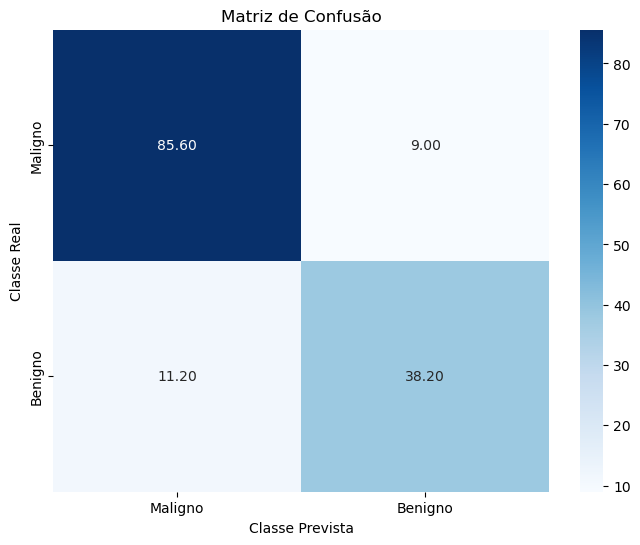


Accuracy: 0.86
Precision: 0.88
Recall: 0.90
Precision for negatives: 0.81
Recall for negatives: 0.77
F1 Score: 0.89
Average Log Loss: 0.34
ROC AUC: 0.92


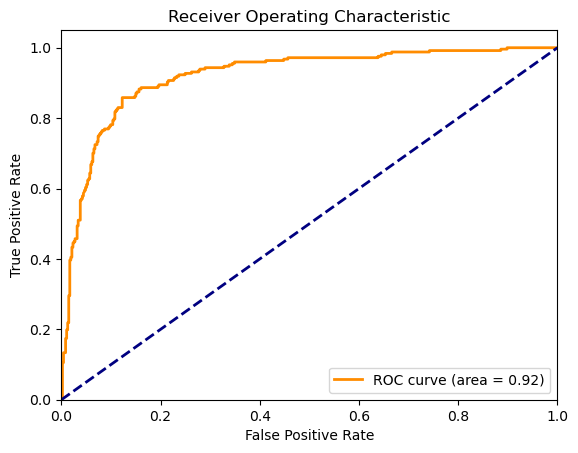

In [13]:
model_xgb = xgb.XGBClassifier(colsample_bytree = 0.6, gamma = 0, learning_rate = 0.1, max_depth = 4, min_child_weight = 3, n_estimators = 50, subsample = 0.6)

conf_matrices = []
y_pred_proba_list = []
y_test_list = []
log_losses = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_xgb.fit(X_train_fold, y_train_fold)
    y_pred_fold = model_xgb.predict(X_test_fold)
    y_pred_proba_fold = model_xgb.predict_proba(X_test_fold)[:, 1]
    
    conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))
    y_pred_proba_list.append(y_pred_proba_fold)
    y_test_list.append(y_test_fold)
    log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))
    
conf_matrix = np.average(conf_matrices, axis=0)
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Maligno', 'Benigno'], columns=['Maligno', 'Benigno'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()
print()

TP, FN, FP, TN = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
precision_neg = TN / (TN + FN)
recall_neg = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)
avg_log_loss = np.mean(log_losses)

y_test_combined = np.concatenate(y_test_list)
y_pred_proba_combined = np.concatenate(y_pred_proba_list)
fpr, tpr, _ = roc_curve(y_test_combined, y_pred_proba_combined)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision for negatives: {precision_neg:.2f}")
print(f"Recall for negatives: {recall_neg:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Average Log Loss: {avg_log_loss:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

PCA para o XGBoost baseado na accuracy, no recall, e no balanceamento

In [77]:
model_xgb = xgb.XGBClassifier(colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.6)
max_score_accuracy = 0
max_score_recall = 0
max_score_bal = 0
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i in range(1, 559, 1):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_train_pca = pd.DataFrame(X_train_pca)
    conf_matrices = []
    y_pred_proba_list = []
    y_test_list = []
    log_losses = []

    for train_index, test_index in skf.split(X_train_pca, y_train):
        X_train_fold, X_test_fold = X_train_pca.iloc[train_index], X_train_pca.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        model_xgb.fit(X_train_fold, y_train_fold)
        y_pred_fold = model_xgb.predict(X_test_fold)
        conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))

        y_pred_proba_fold = model_xgb.predict_proba(X_test_fold)
        y_pred_proba_list.append(y_pred_proba_fold)
        y_test_list.append(y_test_fold)
        log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))

    conf_matrix = np.average(conf_matrices, axis=0)
    TP, FN, FP, TN = conf_matrix.ravel()
    recall = TP / (TP + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    if accuracy > max_score_accuracy:
        max_score_accuracy = accuracy
        max_component_accuracy = i
        X_train_xgb = X_train_pca
        X_test_xgb = X_test_pca

    if recall > max_score_recall:
        max_score_recall = recall
        max_component_recall = i
        X_train_xgb2 = X_train_pca
        X_test_xgb2 = X_test_pca

    if recall > max_score_bal and accuracy >= 0.75:
        max_score_bal = recall
        max_component_bal = i
        X_train_xgb3 = X_train_pca
        X_test_xgb3 = X_test_pca

    print(f"For {i} components, recall = {recall}, accuracy = {accuracy}")

np.save('X_train_xgb.npy', X_train_xgb)
np.save('X_test_xgb.npy', X_test_xgb)
np.save('X_train_xgb2.npy', X_train_xgb2)
np.save('X_test_xgb2.npy', X_test_xgb2)
np.save('X_train_xgb3.npy', X_train_xgb3)
np.save('X_test_xgb3.npy', X_test_xgb3)

For 1 components, recall = 1.0, accuracy = 0.6569444444444444
For 2 components, recall = 0.8604651162790697, accuracy = 0.6611111111111111
For 3 components, recall = 0.879492600422833, accuracy = 0.6916666666666667
For 4 components, recall = 0.854122621564482, accuracy = 0.6916666666666667
For 5 components, recall = 0.8668076109936576, accuracy = 0.7
For 6 components, recall = 0.86892177589852, accuracy = 0.7069444444444444
For 7 components, recall = 0.864693446088795, accuracy = 0.7291666666666666
For 8 components, recall = 0.86892177589852, accuracy = 0.7333333333333333
For 9 components, recall = 0.8372093023255813, accuracy = 0.6888888888888889
For 10 components, recall = 0.8393234672304439, accuracy = 0.7111111111111111
For 11 components, recall = 0.8562367864693446, accuracy = 0.7277777777777777
For 12 components, recall = 0.8477801268498942, accuracy = 0.7097222222222223
For 13 components, recall = 0.8562367864693446, accuracy = 0.7222222222222222
For 14 components, recall = 0.83

For 108 components, recall = 0.864693446088795, accuracy = 0.7388888888888888
For 109 components, recall = 0.8520084566596194, accuracy = 0.7333333333333333
For 110 components, recall = 0.8583509513742071, accuracy = 0.7291666666666666
For 111 components, recall = 0.8583509513742071, accuracy = 0.7291666666666666
For 112 components, recall = 0.8372093023255813, accuracy = 0.7263888888888889
For 113 components, recall = 0.86892177589852, accuracy = 0.7430555555555556
For 114 components, recall = 0.86892177589852, accuracy = 0.7444444444444445
For 115 components, recall = 0.8456659619450317, accuracy = 0.7291666666666666
For 116 components, recall = 0.8477801268498942, accuracy = 0.7263888888888889
For 117 components, recall = 0.8562367864693446, accuracy = 0.7291666666666666
For 118 components, recall = 0.8520084566596194, accuracy = 0.723611111111111
For 119 components, recall = 0.8520084566596194, accuracy = 0.7277777777777777
For 120 components, recall = 0.8604651162790697, accuracy 

For 214 components, recall = 0.8858350951374208, accuracy = 0.7541666666666667
For 215 components, recall = 0.8773784355179705, accuracy = 0.7652777777777778
For 216 components, recall = 0.8773784355179705, accuracy = 0.7486111111111111
For 217 components, recall = 0.8773784355179705, accuracy = 0.7583333333333333
For 218 components, recall = 0.8816067653276956, accuracy = 0.7555555555555556
For 219 components, recall = 0.879492600422833, accuracy = 0.7541666666666667
For 220 components, recall = 0.8964059196617337, accuracy = 0.7722222222222221
For 221 components, recall = 0.8837209302325582, accuracy = 0.7638888888888888
For 222 components, recall = 0.8985200845665963, accuracy = 0.7666666666666667
For 223 components, recall = 0.8752642706131079, accuracy = 0.75
For 224 components, recall = 0.8921775898520085, accuracy = 0.7625000000000001
For 225 components, recall = 0.8710359408033826, accuracy = 0.75
For 226 components, recall = 0.8900634249471459, accuracy = 0.7666666666666667
Fo

For 320 components, recall = 0.8985200845665963, accuracy = 0.7694444444444444
For 321 components, recall = 0.9006342494714588, accuracy = 0.7638888888888888
For 322 components, recall = 0.8985200845665963, accuracy = 0.7625
For 323 components, recall = 0.8668076109936576, accuracy = 0.7513888888888889
For 324 components, recall = 0.8985200845665963, accuracy = 0.7583333333333333
For 325 components, recall = 0.8837209302325582, accuracy = 0.7527777777777778
For 326 components, recall = 0.8985200845665963, accuracy = 0.7583333333333333
For 327 components, recall = 0.8858350951374208, accuracy = 0.7541666666666667
For 328 components, recall = 0.9090909090909092, accuracy = 0.7819444444444444
For 329 components, recall = 0.9027484143763214, accuracy = 0.7680555555555556
For 330 components, recall = 0.9090909090909092, accuracy = 0.7583333333333333
For 331 components, recall = 0.9090909090909092, accuracy = 0.7749999999999999
For 332 components, recall = 0.8942917547568711, accuracy = 0.77

For 426 components, recall = 0.8942917547568711, accuracy = 0.7486111111111111
For 427 components, recall = 0.9027484143763214, accuracy = 0.7694444444444445
For 428 components, recall = 0.9090909090909092, accuracy = 0.7541666666666667
For 429 components, recall = 0.8858350951374208, accuracy = 0.7569444444444444
For 430 components, recall = 0.9027484143763214, accuracy = 0.7666666666666667
For 431 components, recall = 0.8985200845665963, accuracy = 0.7472222222222222
For 432 components, recall = 0.904862579281184, accuracy = 0.7583333333333333
For 433 components, recall = 0.8985200845665963, accuracy = 0.7444444444444445
For 434 components, recall = 0.8964059196617337, accuracy = 0.7569444444444444
For 435 components, recall = 0.9175475687103595, accuracy = 0.7722222222222221
For 436 components, recall = 0.9027484143763214, accuracy = 0.7486111111111112
For 437 components, recall = 0.8837209302325582, accuracy = 0.75
For 438 components, recall = 0.8837209302325582, accuracy = 0.74444

For 531 components, recall = 0.8964059196617337, accuracy = 0.7569444444444444
For 532 components, recall = 0.9006342494714588, accuracy = 0.7555555555555555
For 533 components, recall = 0.9027484143763214, accuracy = 0.7638888888888888
For 534 components, recall = 0.9217758985200846, accuracy = 0.7611111111111111
For 535 components, recall = 0.9069767441860466, accuracy = 0.7555555555555555
For 536 components, recall = 0.9112050739957717, accuracy = 0.7638888888888888
For 537 components, recall = 0.9154334038054969, accuracy = 0.7680555555555555
For 538 components, recall = 0.9090909090909092, accuracy = 0.7625
For 539 components, recall = 0.9112050739957717, accuracy = 0.7694444444444444
For 540 components, recall = 0.8921775898520085, accuracy = 0.7597222222222223
For 541 components, recall = 0.9196617336152221, accuracy = 0.7541666666666667
For 542 components, recall = 0.9027484143763214, accuracy = 0.7486111111111112
For 543 components, recall = 0.9133192389006343, accuracy = 0.75

In [78]:
print(f"Max score accuracy: {max_score_accuracy:.2}")
print(f"Nº ideal de features: {max_component_accuracy}")
print(f"Max score recall: {max_score_recall:.2}")
print(f"Nº ideal de features: {max_component_recall}")
print(f"Max score recall (balanceado com accuracy): {max_score_bal:.2}")
print(f"Nº ideal de features: {max_component_bal}")

Max score accuracy: 0.79
Nº ideal de features: 316
Max score recall: 1.0
Nº ideal de features: 1
Max score recall (balanceado com accuracy): 0.93
Nº ideal de features: 484


Execução de XGBoost com fine tuning e X_train retirado do PCA baseado na accuracy

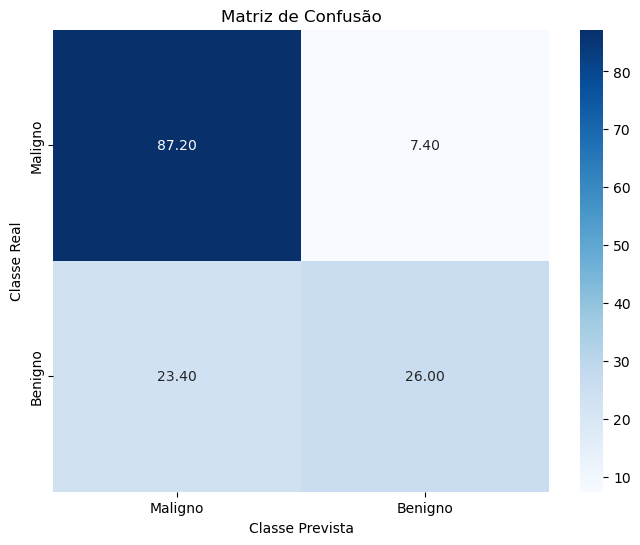


Accuracy: 0.79
Precision: 0.79
Recall: 0.92
Precision for negatives: 0.78
Recall for negatives: 0.53
F1 Score: 0.85
Average Log Loss: 0.47
ROC AUC: 0.83


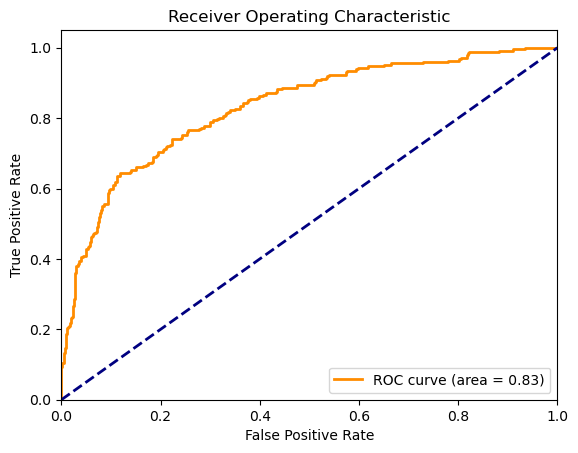

In [79]:
model_xgb = xgb.XGBClassifier(colsample_bytree = 0.6, gamma = 0, learning_rate = 0.1, max_depth = 4, min_child_weight = 3, n_estimators = 50, subsample = 0.6)
X_train_xgb = np.load('X_train_xgb.npy')
X_train_xgb = pd.DataFrame(X_train_xgb)

conf_matrices = []
y_pred_proba_list = []
y_test_list = []
log_losses = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for train_index, test_index in skf.split(X_train_xgb, y_train):
    X_train_fold, X_test_fold = X_train_xgb.iloc[train_index], X_train_xgb.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_xgb.fit(X_train_fold, y_train_fold)
    y_pred_fold = model_xgb.predict(X_test_fold)
    y_pred_proba_fold = model_xgb.predict_proba(X_test_fold)[:, 1]
    
    conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))
    y_pred_proba_list.append(y_pred_proba_fold)
    y_test_list.append(y_test_fold)
    log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))
    
conf_matrix = np.average(conf_matrices, axis=0)
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Maligno', 'Benigno'], columns=['Maligno', 'Benigno'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()
print()

TP, FN, FP, TN = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
precision_neg = TN / (TN + FN)
recall_neg = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)
avg_log_loss = np.mean(log_losses)

y_test_combined = np.concatenate(y_test_list)
y_pred_proba_combined = np.concatenate(y_pred_proba_list)
fpr, tpr, _ = roc_curve(y_test_combined, y_pred_proba_combined)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision for negatives: {precision_neg:.2f}")
print(f"Recall for negatives: {recall_neg:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Average Log Loss: {avg_log_loss:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Execução de XGBoost com fine tuning e X_train retirado do PCA baseado no recall

Nº ideal de features: 1
Nº de componentes no DataFrame: 1


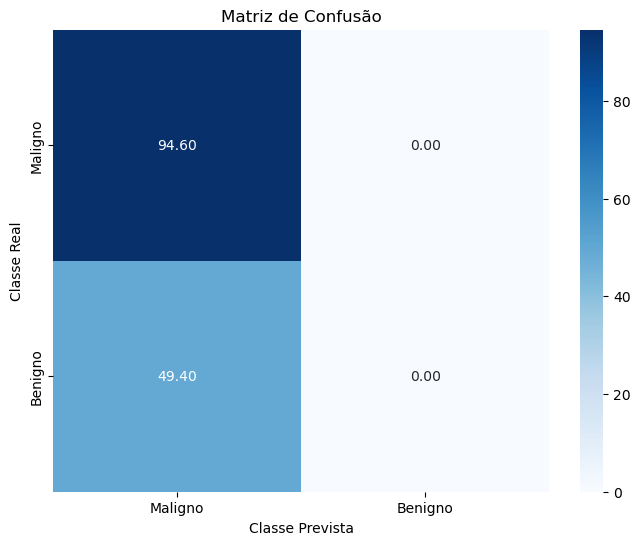


Accuracy: 0.66
Precision: 0.66
Recall: 1.00
Precision for negatives: nan
Recall for negatives: 0.00
F1 Score: 0.79
Average Log Loss: 0.64
ROC AUC: 0.50


/tmp/ipykernel_2252/988563580.py:42: RuntimeWarning: invalid value encountered in scalar divide
  precision_neg = TN / (TN + FN)


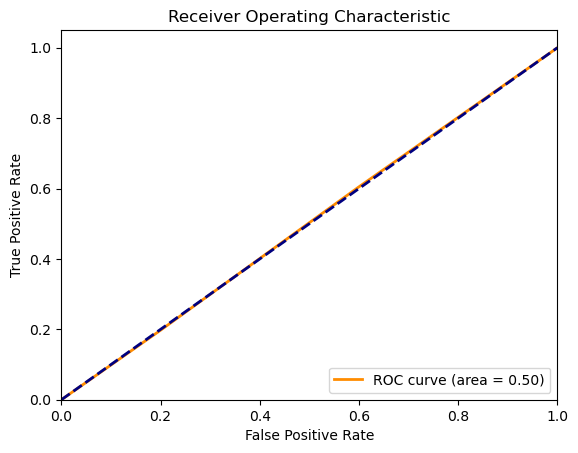

In [80]:
model_xgb = xgb.XGBClassifier(colsample_bytree = 0.6, gamma = 0, learning_rate = 0.1, max_depth = 4, min_child_weight = 3, n_estimators = 50, subsample = 0.6)
X_train_xgb2 = np.load('X_train_xgb2.npy')
X_train_xgb2 = pd.DataFrame(X_train_xgb2)
print(f"Nº ideal de features: {max_component_recall}")
print(f"Nº de componentes no DataFrame: {X_train_xgb2.shape[1]}")
conf_matrices = []
y_pred_proba_list = []
y_test_list = []
log_losses = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for train_index, test_index in skf.split(X_train_xgb2, y_train):
    X_train_fold, X_test_fold = X_train_xgb2.iloc[train_index], X_train_xgb2.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_xgb.fit(X_train_fold, y_train_fold)
    y_pred_fold = model_xgb.predict(X_test_fold)
    y_pred_proba_fold = model_xgb.predict_proba(X_test_fold)[:, 1]
    
    conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))
    y_pred_proba_list.append(y_pred_proba_fold)
    y_test_list.append(y_test_fold)
    log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))
    
conf_matrix = np.average(conf_matrices, axis=0)
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Maligno', 'Benigno'], columns=['Maligno', 'Benigno'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()
print()

TP, FN, FP, TN = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
precision_neg = TN / (TN + FN)
recall_neg = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)
avg_log_loss = np.mean(log_losses)

y_test_combined = np.concatenate(y_test_list)
y_pred_proba_combined = np.concatenate(y_pred_proba_list)
fpr, tpr, _ = roc_curve(y_test_combined, y_pred_proba_combined)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision for negatives: {precision_neg:.2f}")
print(f"Recall for negatives: {recall_neg:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Average Log Loss: {avg_log_loss:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Execução de XGBoost com fine tuning e X_train retirado do PCA baseado no balanceamento entre accuracy e recall

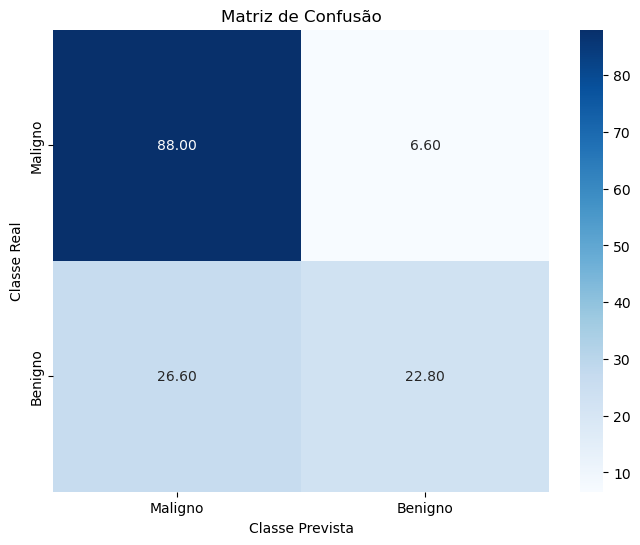


Accuracy: 0.77
Precision: 0.77
Recall: 0.93
Precision for negatives: 0.78
Recall for negatives: 0.46
F1 Score: 0.84
Average Log Loss: 0.49
ROC AUC: 0.82


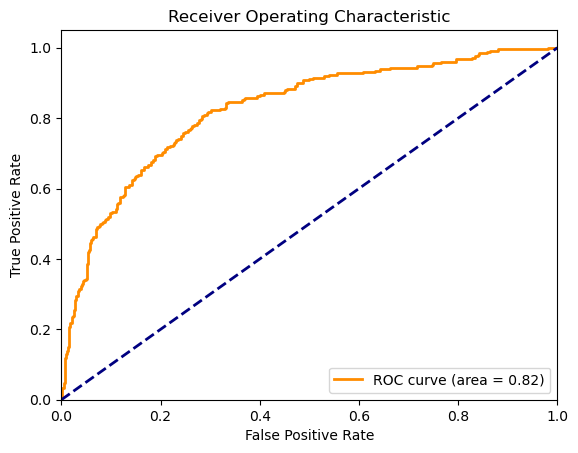

In [81]:
model_xgb = xgb.XGBClassifier(colsample_bytree = 0.6, gamma = 0, learning_rate = 0.1, max_depth = 4, min_child_weight = 3, n_estimators = 50, subsample = 0.6)
X_train_xgb3 = np.load('X_train_xgb3.npy')
X_train_xgb3 = pd.DataFrame(X_train_xgb3)

conf_matrices = []
y_pred_proba_list = []
y_test_list = []
log_losses = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for train_index, test_index in skf.split(X_train_xgb3, y_train):
    X_train_fold, X_test_fold = X_train_xgb3.iloc[train_index], X_train_xgb3.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_xgb.fit(X_train_fold, y_train_fold)
    y_pred_fold = model_xgb.predict(X_test_fold)
    y_pred_proba_fold = model_xgb.predict_proba(X_test_fold)[:, 1]
    
    conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))
    y_pred_proba_list.append(y_pred_proba_fold)
    y_test_list.append(y_test_fold)
    log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))
    
conf_matrix = np.average(conf_matrices, axis=0)
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Maligno', 'Benigno'], columns=['Maligno', 'Benigno'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()
print()

TP, FN, FP, TN = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
precision_neg = TN / (TN + FN)
recall_neg = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)
avg_log_loss = np.mean(log_losses)

y_test_combined = np.concatenate(y_test_list)
y_pred_proba_combined = np.concatenate(y_pred_proba_list)
fpr, tpr, _ = roc_curve(y_test_combined, y_pred_proba_combined)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision for negatives: {precision_neg:.2f}")
print(f"Recall for negatives: {recall_neg:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Average Log Loss: {avg_log_loss:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# SVM

Fine tuning do SVM Classifier

In [68]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'sigmoid']
}

svm_classifier = SVC(random_state=42)

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, refit=True, cv=3, n_jobs=-2, verbose=3)

grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.1s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.658 total time=   0.1s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.658 total time=   0.1s
[CV 1/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.654 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.658 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.658 total time=   0.0s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.654 total time=   0.1s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.658 total time=   0.1s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.658 total time=   0.1s
[CV 1/3] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.654 total time=   0.0s
[CV 2/3] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.658 total time=   0.0s
[CV 3/3] END ..C=0.1, gamma=0.1, kernel=sigmoid;

In [9]:
print("Melhores parâmetros encontrados:", grid_search.best_params_)

Melhores parâmetros encontrados: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


Execução do modelo SVM com fine tuning

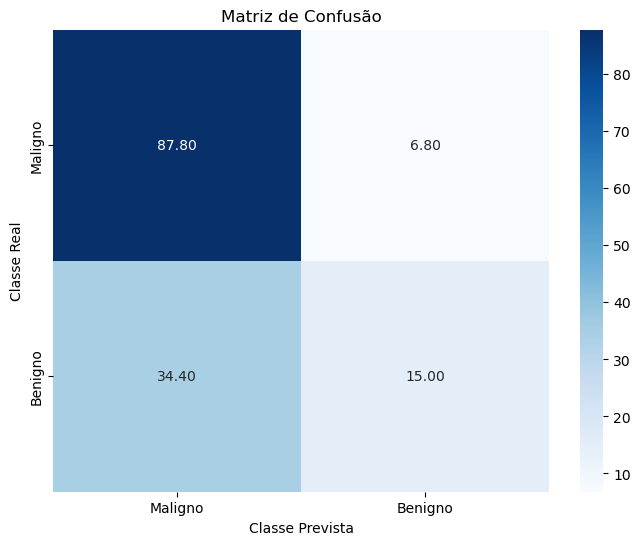


Accuracy: 0.71
Precision: 0.72
Recall: 0.93
Precision for negatives: 0.69
Recall for negatives: 0.30
F1 Score: 0.81
Average Log Loss: 0.56
ROC AUC: 0.73


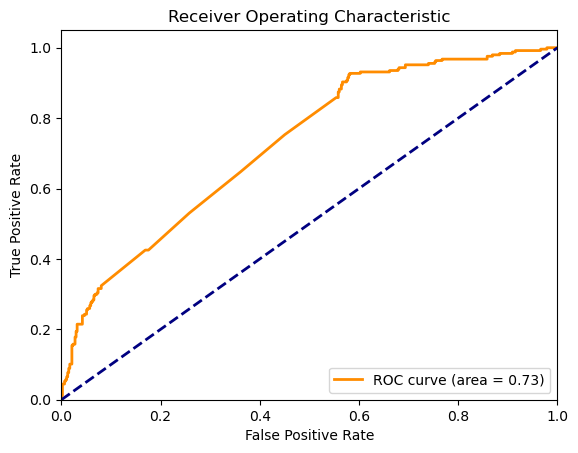

In [39]:
model_svm = SVC(C = 10, gamma = 0.001, kernel = 'rbf', probability = True)

conf_matrices = []
y_pred_proba_list = []
y_test_list = []
log_losses = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_svm.fit(X_train_fold, y_train_fold)
    y_pred_fold = model_svm.predict(X_test_fold)
    y_pred_proba_fold = model_svm.predict_proba(X_test_fold)[:, 1]
    
    conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))
    y_pred_proba_list.append(y_pred_proba_fold)
    y_test_list.append(y_test_fold)
    log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))
    
conf_matrix = np.average(conf_matrices, axis=0)
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Maligno', 'Benigno'], columns=['Maligno', 'Benigno'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()
print()

TP, FN, FP, TN = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
precision_neg = TN / (TN + FN)
recall_neg = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)
avg_log_loss = np.mean(log_losses)

y_test_combined = np.concatenate(y_test_list)
y_pred_proba_combined = np.concatenate(y_pred_proba_list)
fpr, tpr, _ = roc_curve(y_test_combined, y_pred_proba_combined)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision for negatives: {precision_neg:.2f}")
print(f"Recall for negatives: {recall_neg:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Average Log Loss: {avg_log_loss:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


PCA para o SVM

In [84]:
model_svm = SVC(C = 10, gamma = 0.001, kernel = 'rbf', probability = True)
max_score_accuracy = 0
max_score_recall = 0
max_score_bal = 0
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i in range(2, 559, 1):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_train_pca = pd.DataFrame(X_train_pca)
    conf_matrices = []
    y_pred_proba_list = []
    y_test_list = []
    log_losses = []

    for train_index, test_index in skf.split(X_train_pca, y_train):
        X_train_fold, X_test_fold = X_train_pca.iloc[train_index], X_train_pca.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        model_svm.fit(X_train_fold, y_train_fold)
        y_pred_fold = model_svm.predict(X_test_fold)
        conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))

        y_pred_proba_fold = model_svm.predict_proba(X_test_fold)
        y_pred_proba_list.append(y_pred_proba_fold)
        y_test_list.append(y_test_fold)
        log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))

    conf_matrix = np.average(conf_matrices, axis=0)
    TP, FN, FP, TN = conf_matrix.ravel()
    recall = TP / (TP + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    if accuracy > max_score_accuracy:
        max_score_accuracy = accuracy
        max_component_accuracy = i
        X_train_svm = X_train_pca
        X_test_svm = X_test_pca

    if recall > max_score_recall:
        max_score_recall = recall
        max_component_recall = i
        X_train_svm2 = X_train_pca
        X_test_svm2 = X_test_pca

    if recall > max_score_bal and accuracy >= 0.70:
        max_score_bal = recall
        max_component_bal = i
        X_train_svm3 = X_train_pca
        X_test_svm3 = X_test_pca

    print(f"For {i} components, recall = {recall}, accuracy = {accuracy}")

np.save('X_train_svm.npy', X_train_svm)
np.save('X_test_svm.npy', X_test_svm)
np.save('X_train_svm2.npy', X_train_svm2)
np.save('X_test_svm2.npy', X_test_svm2)
np.save('X_train_svm3.npy', X_train_svm3)
np.save('X_test_svm3.npy', X_test_svm3)

For 2 components, recall = 0.9027484143763214, accuracy = 0.6875
For 3 components, recall = 0.9217758985200846, accuracy = 0.7027777777777778
For 4 components, recall = 0.9217758985200846, accuracy = 0.7027777777777778
For 5 components, recall = 0.9175475687103595, accuracy = 0.7041666666666666
For 6 components, recall = 0.9196617336152221, accuracy = 0.7041666666666667
For 7 components, recall = 0.9238900634249472, accuracy = 0.7069444444444445
For 8 components, recall = 0.9238900634249472, accuracy = 0.7055555555555556
For 9 components, recall = 0.9217758985200846, accuracy = 0.7013888888888888
For 10 components, recall = 0.9175475687103595, accuracy = 0.6986111111111111
For 11 components, recall = 0.9196617336152221, accuracy = 0.7013888888888888
For 12 components, recall = 0.9175475687103595, accuracy = 0.7041666666666666
For 13 components, recall = 0.9238900634249472, accuracy = 0.7055555555555556
For 14 components, recall = 0.9154334038054969, accuracy = 0.7013888888888888
For 15

For 109 components, recall = 0.9133192389006343, accuracy = 0.6986111111111112
For 110 components, recall = 0.9175475687103595, accuracy = 0.7
For 111 components, recall = 0.9154334038054969, accuracy = 0.7
For 112 components, recall = 0.9133192389006343, accuracy = 0.7000000000000001
For 113 components, recall = 0.9175475687103595, accuracy = 0.7013888888888888
For 114 components, recall = 0.9217758985200846, accuracy = 0.7027777777777778
For 115 components, recall = 0.9175475687103595, accuracy = 0.7013888888888888
For 116 components, recall = 0.9196617336152221, accuracy = 0.7027777777777778
For 117 components, recall = 0.9175475687103595, accuracy = 0.7
For 118 components, recall = 0.9196617336152221, accuracy = 0.7027777777777778
For 119 components, recall = 0.9154334038054969, accuracy = 0.7
For 120 components, recall = 0.9154334038054969, accuracy = 0.7
For 121 components, recall = 0.9154334038054969, accuracy = 0.6986111111111111
For 122 components, recall = 0.9154334038054969,

For 216 components, recall = 0.9281183932346724, accuracy = 0.7152777777777778
For 217 components, recall = 0.9260042283298098, accuracy = 0.7124999999999999
For 218 components, recall = 0.9238900634249472, accuracy = 0.7111111111111111
For 219 components, recall = 0.9238900634249472, accuracy = 0.713888888888889
For 220 components, recall = 0.9238900634249472, accuracy = 0.7111111111111111
For 221 components, recall = 0.9238900634249472, accuracy = 0.7083333333333334
For 222 components, recall = 0.930232558139535, accuracy = 0.7166666666666667
For 223 components, recall = 0.9238900634249472, accuracy = 0.7097222222222223
For 224 components, recall = 0.9238900634249472, accuracy = 0.7111111111111111
For 225 components, recall = 0.9238900634249472, accuracy = 0.7083333333333334
For 226 components, recall = 0.9196617336152221, accuracy = 0.7069444444444444
For 227 components, recall = 0.9238900634249472, accuracy = 0.7097222222222223
For 228 components, recall = 0.9175475687103595, accur

For 321 components, recall = 0.9260042283298098, accuracy = 0.711111111111111
For 322 components, recall = 0.9238900634249472, accuracy = 0.7083333333333334
For 323 components, recall = 0.9260042283298098, accuracy = 0.7138888888888889
For 324 components, recall = 0.9217758985200846, accuracy = 0.7069444444444444
For 325 components, recall = 0.9217758985200846, accuracy = 0.7124999999999999
For 326 components, recall = 0.9281183932346724, accuracy = 0.7152777777777778
For 327 components, recall = 0.9196617336152221, accuracy = 0.7097222222222223
For 328 components, recall = 0.9196617336152221, accuracy = 0.7097222222222223
For 329 components, recall = 0.9217758985200846, accuracy = 0.711111111111111
For 330 components, recall = 0.9238900634249472, accuracy = 0.7111111111111111
For 331 components, recall = 0.9238900634249472, accuracy = 0.7083333333333334
For 332 components, recall = 0.9175475687103595, accuracy = 0.7069444444444444
For 333 components, recall = 0.9260042283298098, accur

For 426 components, recall = 0.9196617336152221, accuracy = 0.7083333333333334
For 427 components, recall = 0.9175475687103595, accuracy = 0.7069444444444444
For 428 components, recall = 0.9281183932346724, accuracy = 0.7138888888888889
For 429 components, recall = 0.930232558139535, accuracy = 0.7138888888888889
For 430 components, recall = 0.9217758985200846, accuracy = 0.7097222222222223
For 431 components, recall = 0.9238900634249472, accuracy = 0.7111111111111111
For 432 components, recall = 0.9281183932346724, accuracy = 0.7138888888888889
For 433 components, recall = 0.9217758985200846, accuracy = 0.7097222222222223
For 434 components, recall = 0.9196617336152221, accuracy = 0.7055555555555556
For 435 components, recall = 0.9133192389006343, accuracy = 0.7055555555555556
For 436 components, recall = 0.9281183932346724, accuracy = 0.7166666666666667
For 437 components, recall = 0.9217758985200846, accuracy = 0.7083333333333334
For 438 components, recall = 0.9217758985200846, accu

For 530 components, recall = 0.9196617336152221, accuracy = 0.7083333333333334
For 531 components, recall = 0.9196617336152221, accuracy = 0.7083333333333334
For 532 components, recall = 0.9196617336152221, accuracy = 0.7083333333333334
For 533 components, recall = 0.9196617336152221, accuracy = 0.7083333333333334
For 534 components, recall = 0.9196617336152221, accuracy = 0.7083333333333334
For 535 components, recall = 0.9196617336152221, accuracy = 0.7083333333333334
For 536 components, recall = 0.9196617336152221, accuracy = 0.7083333333333334
For 537 components, recall = 0.9196617336152221, accuracy = 0.7083333333333334
For 538 components, recall = 0.9196617336152221, accuracy = 0.7083333333333334
For 539 components, recall = 0.9196617336152221, accuracy = 0.7083333333333334
For 540 components, recall = 0.9196617336152221, accuracy = 0.7083333333333334
For 541 components, recall = 0.9196617336152221, accuracy = 0.7083333333333334
For 542 components, recall = 0.9196617336152221, acc

In [85]:
print(f"Max score accuracy: {max_score_accuracy:.2}")
print(f"Nº ideal de features: {max_component_accuracy}")
print(f"Max score recall: {max_score_recall:.2}")
print(f"Nº ideal de features: {max_component_recall}")
print(f"Max score recall (balanceado com accuracy): {max_score_bal:.2}")
print(f"Nº ideal de features: {max_component_bal}")

Max score accuracy: 0.72
Nº ideal de features: 370
Max score recall: 0.93
Nº ideal de features: 259
Max score recall (balanceado com accuracy): 0.93
Nº ideal de features: 259


Execução de Support Vector Machine com fine tuning e X_train retirado do PCA baseado na accuracy

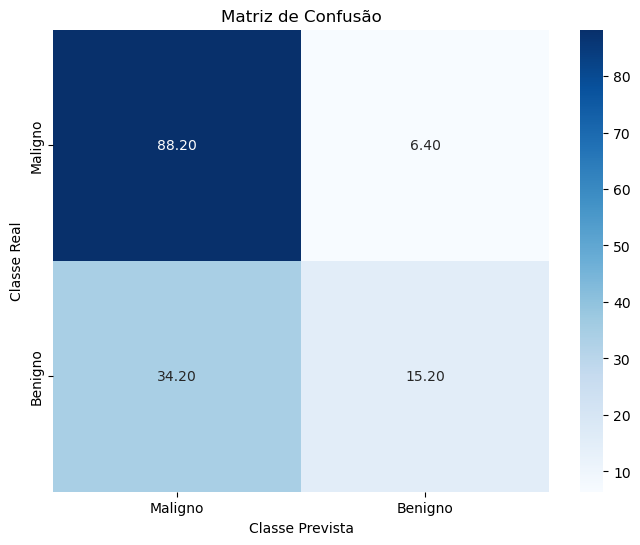


Accuracy: 0.72
Precision: 0.72
Recall: 0.93
Precision for negatives: 0.70
Recall for negatives: 0.31
F1 Score: 0.81
Average Log Loss: 0.66
ROC AUC: 0.72


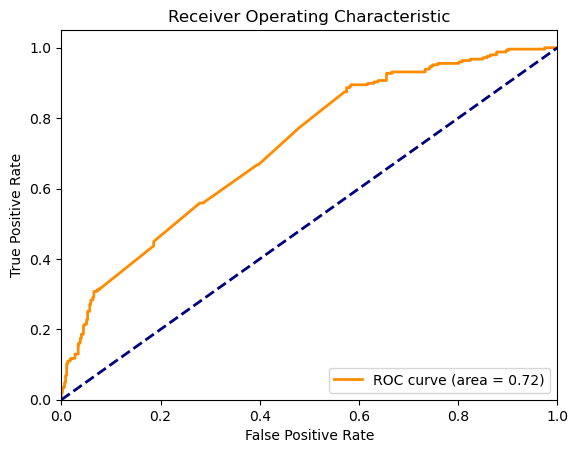

In [86]:
model_svm = SVC(C = 10, gamma = 0.001, kernel = 'rbf', probability = True)
X_train_svm = np.load('X_train_svm.npy')
X_train_svm = pd.DataFrame(X_train_svm)

conf_matrices = []
y_pred_proba_list = []
y_test_list = []
log_losses = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for train_index, test_index in skf.split(X_train_svm, y_train):
    X_train_fold, X_test_fold = X_train_svm.iloc[train_index], X_train_svm.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_svm.fit(X_train_fold, y_train_fold)
    y_pred_fold = model_svm.predict(X_test_fold)
    y_pred_proba_fold = model_svm.predict_proba(X_test_fold)[:, 1]
    
    conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))
    y_pred_proba_list.append(y_pred_proba_fold)
    y_test_list.append(y_test_fold)
    log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))
    
conf_matrix = np.average(conf_matrices, axis=0)
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Maligno', 'Benigno'], columns=['Maligno', 'Benigno'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()
print()

TP, FN, FP, TN = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
precision_neg = TN / (TN + FN)
recall_neg = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)
avg_log_loss = np.mean(log_losses)

y_test_combined = np.concatenate(y_test_list)
y_pred_proba_combined = np.concatenate(y_pred_proba_list)
fpr, tpr, _ = roc_curve(y_test_combined, y_pred_proba_combined)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision for negatives: {precision_neg:.2f}")
print(f"Recall for negatives: {recall_neg:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Average Log Loss: {avg_log_loss:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Execução de Support Vector Machine com fine tuning e X_train retirado do PCA baseado no recall

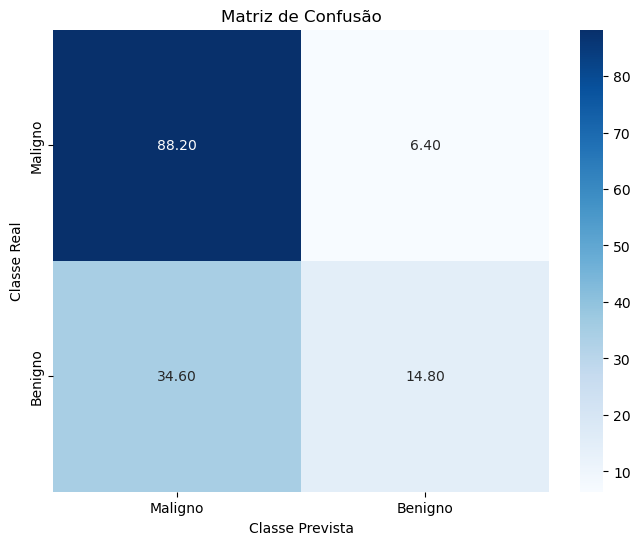


Accuracy: 0.72
Precision: 0.72
Recall: 0.93
Precision for negatives: 0.70
Recall for negatives: 0.30
F1 Score: 0.81
Average Log Loss: 0.61
ROC AUC: 0.71


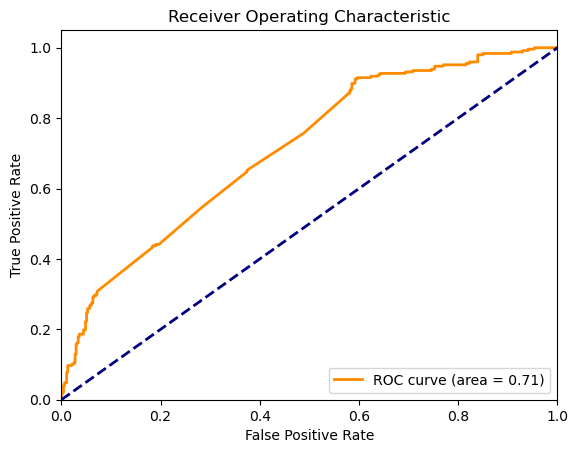

In [87]:
model_svm = SVC(C = 10, gamma = 0.001, kernel = 'rbf', probability = True)
X_train_svm2 = np.load('X_train_svm2.npy')
X_train_svm2 = pd.DataFrame(X_train_svm2)

conf_matrices = []
y_pred_proba_list = []
y_test_list = []
log_losses = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for train_index, test_index in skf.split(X_train_svm2, y_train):
    X_train_fold, X_test_fold = X_train_svm2.iloc[train_index], X_train_svm2.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_svm.fit(X_train_fold, y_train_fold)
    y_pred_fold = model_svm.predict(X_test_fold)
    y_pred_proba_fold = model_svm.predict_proba(X_test_fold)[:, 1]
    
    conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))
    y_pred_proba_list.append(y_pred_proba_fold)
    y_test_list.append(y_test_fold)
    log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))
    
conf_matrix = np.average(conf_matrices, axis=0)
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Maligno', 'Benigno'], columns=['Maligno', 'Benigno'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()
print()

TP, FN, FP, TN = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
precision_neg = TN / (TN + FN)
recall_neg = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)
avg_log_loss = np.mean(log_losses)

y_test_combined = np.concatenate(y_test_list)
y_pred_proba_combined = np.concatenate(y_pred_proba_list)
fpr, tpr, _ = roc_curve(y_test_combined, y_pred_proba_combined)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision for negatives: {precision_neg:.2f}")
print(f"Recall for negatives: {recall_neg:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Average Log Loss: {avg_log_loss:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Execução do Support Vector Machine com fine tuning e X_train retirado do PCA baseado no balanceamento entre accuracy e recall

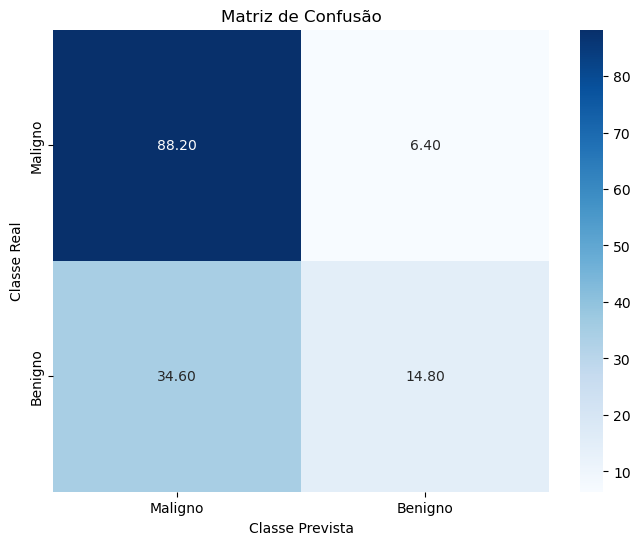


Accuracy: 0.72
Precision: 0.72
Recall: 0.93
Precision for negatives: 0.70
Recall for negatives: 0.30
F1 Score: 0.81
Average Log Loss: 0.61
ROC AUC: 0.71


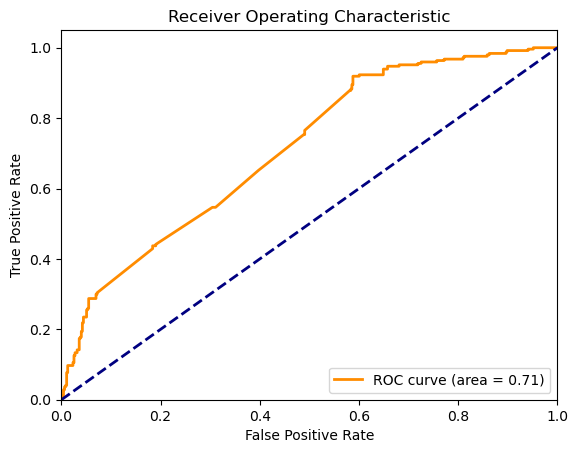

In [88]:
model_svm = SVC(C = 10, gamma = 0.001, kernel = 'rbf', probability = True)
X_train_svm3 = np.load('X_train_svm3.npy')
X_train_svm3 = pd.DataFrame(X_train_svm3)

conf_matrices = []
y_pred_proba_list = []
y_test_list = []
log_losses = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for train_index, test_index in skf.split(X_train_svm3, y_train):
    X_train_fold, X_test_fold = X_train_svm3.iloc[train_index], X_train_svm3.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_svm.fit(X_train_fold, y_train_fold)
    y_pred_fold = model_svm.predict(X_test_fold)
    y_pred_proba_fold = model_svm.predict_proba(X_test_fold)[:, 1]
    
    conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))
    y_pred_proba_list.append(y_pred_proba_fold)
    y_test_list.append(y_test_fold)
    log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))
    
conf_matrix = np.average(conf_matrices, axis=0)
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Maligno', 'Benigno'], columns=['Maligno', 'Benigno'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()
print()

TP, FN, FP, TN = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
precision_neg = TN / (TN + FN)
recall_neg = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)
avg_log_loss = np.mean(log_losses)

y_test_combined = np.concatenate(y_test_list)
y_pred_proba_combined = np.concatenate(y_pred_proba_list)
fpr, tpr, _ = roc_curve(y_test_combined, y_pred_proba_combined)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision for negatives: {precision_neg:.2f}")
print(f"Recall for negatives: {recall_neg:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Average Log Loss: {avg_log_loss:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Random Forest

Fine Tuning do Random Forest Classifier

In [56]:
param_grid = {
    'n_estimators': [100, 300, 500, 700, 900, 1100, 1300, 1500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 2112 candidates, totalling 6336 fits


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=None, n_estimators=300; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=None, n_estimators=300; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=None, n_estimators=500; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=None, n_estimators=500; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=None, n_estimators=700; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=None, n_estimators=900; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=None, n_estimators=900; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, m

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1, n_estimators=1100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1, n_estimators=1300; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1, n_estimators=1300; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1, n_estimators=1500; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_e

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=700; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=900; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=900; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estim

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=900; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=900; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=1100; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=1300; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=1300; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=1500; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=3, n_e

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=1300; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=1500; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=9, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=9, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=9, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=9, n_estimators=500; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=9, n_est

[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=3, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=3, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=3, n_estimators=700; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=3, n_estimators=1300; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=3, n_estimators=1300; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=3, n_estimators=1500; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4, n_e

[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=9, n_estimators=1500; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=300; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=700; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=700; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=900; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1100; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1100; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_est

[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=None, n_estimators=1300; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=None, n_estimators=1500; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=None, n_estimators=1500; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=1, n_estimators=500; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=1, n_estimators=500; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=1, n_estimators=700; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=1, n_estimators=900; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=1, n_estimators=900; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=1, n_estimators=1100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_spl

[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=8, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=8, n_estimators=900; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=8, n_estimators=900; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=8, n_estimators=1100; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=8, n_estimators=1300; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=8, n_estimators=1300; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=8, n_estimators=1500; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=9, n_e

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=1500; total time=   3.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=900; total ti

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1300; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1300; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1500; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=1100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=1100; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=1300; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=1500; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=1500; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=9, n_estimators=500; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=9, n_estimators=700; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=9, n_estimators=700; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=9, n_estimators=900; tota

[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=700; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=1100; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=1300; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=1300; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=1500; total time=   2.7s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total

[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=700; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=700; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=1100; total time=   2.7s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=1300; total time=   3.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=1500; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=700; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=1100; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=1300; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=1300; total 

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=1, n_estimators=1300; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=1, n_estimators=1300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=1, n_estimators=1500; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total 

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=1100; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=1300; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=1300; total 

[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=3, n_estimators=1300; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=3, n_estimators=1500; total time=   3.3s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=4, n_estimators=500; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=4, n_estimators=700; total t

[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=700; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=1300; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=1300; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=1500; total time=   3.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=None, n_estim

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   1.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=1100; total time=   2.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=1300; total time=   2.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=1300; total time=   2.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=1500; total time=   3.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=None, n_estimators=700; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=None, n_estimators=900; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=None, n_estimators=900; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=None, n_estimators=900; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=None, n_estimators=1100; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=None, n_estimators=1300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=None, n_estimators=1300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=None, n_estimators=1500; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=1,

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=7, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=7, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=7, n_estimators=500; total time=   1.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=7, n_estimators=500; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=7, n_estimators=700; total time=   1.9s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=7, n_estimators=900; total time=   2.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=7, n_estimators=900; total tim

[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=700; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=700; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=900; total time=   1.9s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=1100; total time=   2.2s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=1100; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=1300; total 

[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=700; total time=   1.7s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=900; total time=   2.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=1100; total time=   2.2s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=1100; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=1300; total time=   2.4s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=1500; total time=   2.7s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=1500; total time=   2.8s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=9, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=9, n_estimators=500; total time=   0.9s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=9, n_estimators=500; tota

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=1100; total ti

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=700; total time=   1.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=900; total time=   1.8s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=900; total time=   1.8s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=1100; total time=   2.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=1300; total time=   2.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=1300; total time=   2.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=1500; total time=   2.8s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; to

[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=900; total time=   1.7s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=1100; total time=   2.0s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=1300; total time=   2.4s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=1300; total time=   2.4s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=1500; total time=   2.8s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=300; total

[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=2, n_estimators=1300; total time=   2.3s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=2, n_estimators=1500; total time=   2.7s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=3, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=3, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=3, n_estimators=500; total time=   0.9s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=3, n_estimators=700; total time=   1.4s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=3, n_estimators=700; total t

[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=10, n_estimators=700; total time=   1.4s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=10, n_estimators=700; total time=   1.5s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=10, n_estimators=900; total time=   1.8s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=10, n_estimators=1300; total time=   2.2s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=10, n_estimators=1500; total time=   2.6s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=10, n_estimators=1500; total time=   2.6s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=None, n_estimators=900; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=None, n_estima

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   1.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=900; total time=   1.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=900; total time=   1.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=1100; total time=   2.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=1300; total time=   2.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=1300; total time=   2.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=1500; total

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   1.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   2.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   2.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1300; total time=   2.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1500; total time=   3.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1500; total time=   2.9s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=700; total time=   1.4s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=700; tota

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=9, n_estimators=900; total time=   2.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=9, n_estimators=900; total time=   1.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=9, n_estimators=1100; total time=   2.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=9, n_estimators=1300; total time=   2.5s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=9, n_estimators=1300; total time=   2.5s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=9, n_estimators=1500; total time=   3.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; t

[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=700; total time=   1.6s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=700; total time=   1.6s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=1100; total ti

[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=None, n_estimators=300; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=None, n_estimators=500; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=None, n_estimators=500; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=None, n_estimators=500; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=None, n_estimators=700; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=None, n_estimators=700; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=None, n_estimators=700; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=None, n_estimators=900; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=None, n_estimators=900; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=Non

[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=1300; total time=   2.7s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=1500; total time=   4.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=1500; total time=   4.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=7, n_estimators=300; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=7, n_estimators=500; total time=   1.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=7, n_estimators=500; total time=   1.5s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=7, n_estimators=700; total time=   1.8s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=7, n_estimators=900; total time=   2.3s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=7, n_estimators=900; total time=   2.7s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=7, n_estimators=1100; total

[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=1, n_estimators=700; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=1, n_estimators=900; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=1, n_estimators=1100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=1, n_estimators=1100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=1, n_estimators=1300; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=1, n_estimators=1500; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=1, n_estimators=1500; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=2, n_estimators=300; tota

[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=7, n_estimators=1100; total time=   2.9s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=7, n_estimators=1300; total time=   3.6s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=7, n_estimators=1500; total time=   3.6s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=7, n_estimators=1500; total time=   4.1s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   1.4s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   1.7s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=8, n_estimators=900; total time=   2.4s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=8, n_estimators=1100; tota

[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=4, n_estimators=500; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=4, n_estimators=700; total time=   1.7s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=4, n_estimators=700; total time=   1.3s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=4, n_estimators=900; total time=   1.7s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=4, n_estimators=1100; total time=   2.1s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=4, n_estimators=1100; total time=   2.4s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=4, n_estimators=1300; total time=   2.4s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=4, n_estimators=1500; total

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1152 fits failed out of a total of 6336.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
576 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.9/site-packag

In [59]:
print("Melhores parâmetros encontrados:", grid_search.best_params_)

Melhores parâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 100}


Execução do modelo Random Forest com fine tuning

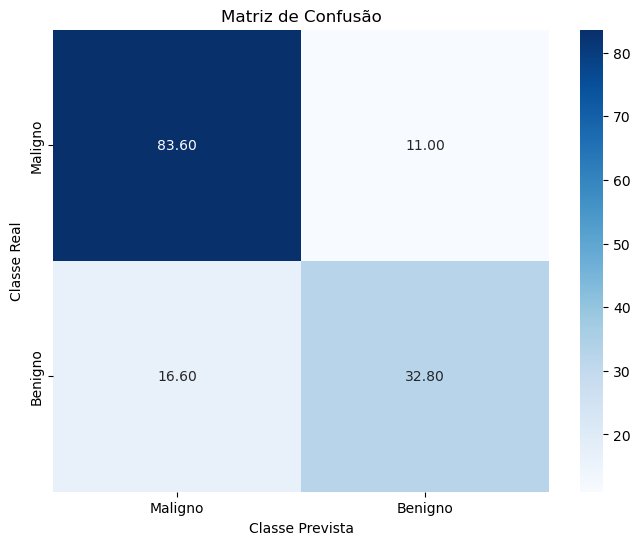


Accuracy: 0.81
Precision: 0.83
Recall: 0.88
Precision for negatives: 0.75
Recall for negatives: 0.66
F1 Score: 0.86
Average Log Loss: 0.42
ROC AUC: 0.88


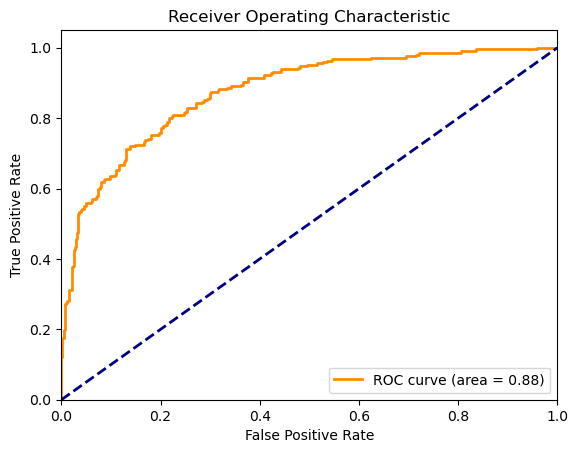

In [89]:
model_rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 9, n_estimators = 100)

conf_matrices = []
y_pred_proba_list = []
y_test_list = []
log_losses = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_rf.fit(X_train_fold, y_train_fold)
    y_pred_fold = model_rf.predict(X_test_fold)
    y_pred_proba_fold = model_rf.predict_proba(X_test_fold)[:, 1]
    
    conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))
    y_pred_proba_list.append(y_pred_proba_fold)
    y_test_list.append(y_test_fold)
    log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))
    
conf_matrix = np.average(conf_matrices, axis=0)
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Maligno', 'Benigno'], columns=['Maligno', 'Benigno'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()
print()

TP, FN, FP, TN = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
precision_neg = TN / (TN + FN)
recall_neg = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)
avg_log_loss = np.mean(log_losses)

y_test_combined = np.concatenate(y_test_list)
y_pred_proba_combined = np.concatenate(y_pred_proba_list)
fpr, tpr, _ = roc_curve(y_test_combined, y_pred_proba_combined)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision for negatives: {precision_neg:.2f}")
print(f"Recall for negatives: {recall_neg:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Average Log Loss: {avg_log_loss:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

PCA para o Random Forest 

In [97]:
model_rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 9, n_estimators = 100)
max_score_accuracy = 0
max_score_recall = 0
max_score_bal = 0
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i in range(1, 559, 1):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_train_pca = pd.DataFrame(X_train_pca)
    conf_matrices = []
    y_pred_proba_list = []
    y_test_list = []
    log_losses = []

    for train_index, test_index in skf.split(X_train_pca, y_train):
        X_train_fold, X_test_fold = X_train_pca.iloc[train_index], X_train_pca.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        model_rf.fit(X_train_fold, y_train_fold)
        y_pred_fold = model_rf.predict(X_test_fold)
        conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))

        y_pred_proba_fold = model_rf.predict_proba(X_test_fold)
        y_pred_proba_list.append(y_pred_proba_fold)
        y_test_list.append(y_test_fold)
        log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))

    conf_matrix = np.average(conf_matrices, axis=0)
    TP, FN, FP, TN = conf_matrix.ravel()
    recall = TP / (TP + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    if accuracy > max_score_accuracy:
        max_score_accuracy = accuracy
        max_component_accuracy = i
        X_train_rf = X_train_pca
        X_test_rf = X_test_pca

    if recall > max_score_recall:
        max_score_recall = recall
        max_component_recall = i
        X_train_rf2 = X_train_pca
        X_test_rf2 = X_test_pca

    if recall > max_score_bal and accuracy >= 0.70:
        max_score_bal = recall
        max_component_bal = i
        X_train_rf3 = X_train_pca
        X_test_rf3 = X_test_pca

    print(f"For {i} components, recall = {recall}, accuracy = {accuracy}")

np.save('X_train_rf.npy', X_train_rf)
np.save('X_test_rf.npy', X_test_rf)
np.save('X_train_rf2.npy', X_train_rf2)
np.save('X_test_rf2.npy', X_test_rf2)
np.save('X_train_rf3.npy', X_train_rf3)
np.save('X_test_rf3.npy', X_test_rf3)

For 1 components, recall = 0.9978858350951374, accuracy = 0.6569444444444446
For 2 components, recall = 0.8118393234672304, accuracy = 0.6763888888888889
For 3 components, recall = 0.8477801268498942, accuracy = 0.7041666666666667
For 4 components, recall = 0.854122621564482, accuracy = 0.7152777777777778
For 5 components, recall = 0.8520084566596194, accuracy = 0.7083333333333334
For 6 components, recall = 0.8435517970401691, accuracy = 0.7194444444444444
For 7 components, recall = 0.8414376321353065, accuracy = 0.723611111111111
For 8 components, recall = 0.8266384778012685, accuracy = 0.7124999999999999
For 9 components, recall = 0.8245243128964059, accuracy = 0.7013888888888888
For 10 components, recall = 0.8393234672304439, accuracy = 0.7166666666666667
For 11 components, recall = 0.8266384778012685, accuracy = 0.7194444444444444
For 12 components, recall = 0.828752642706131, accuracy = 0.7125
For 13 components, recall = 0.8498942917547568, accuracy = 0.7305555555555556
For 14 com

For 107 components, recall = 0.8435517970401691, accuracy = 0.7388888888888888
For 108 components, recall = 0.8414376321353065, accuracy = 0.7444444444444444
For 109 components, recall = 0.8329809725158562, accuracy = 0.7222222222222222
For 110 components, recall = 0.8350951374207188, accuracy = 0.7291666666666666
For 111 components, recall = 0.8393234672304439, accuracy = 0.7305555555555556
For 112 components, recall = 0.8329809725158562, accuracy = 0.7208333333333333
For 113 components, recall = 0.8414376321353065, accuracy = 0.7458333333333332
For 114 components, recall = 0.8372093023255813, accuracy = 0.7333333333333333
For 115 components, recall = 0.8393234672304439, accuracy = 0.7458333333333333
For 116 components, recall = 0.8393234672304439, accuracy = 0.7319444444444445
For 117 components, recall = 0.8245243128964059, accuracy = 0.7263888888888889
For 118 components, recall = 0.8520084566596194, accuracy = 0.7541666666666667
For 119 components, recall = 0.8372093023255813, acc

For 212 components, recall = 0.864693446088795, accuracy = 0.7486111111111111
For 213 components, recall = 0.8773784355179705, accuracy = 0.7583333333333333
For 214 components, recall = 0.8710359408033826, accuracy = 0.7388888888888889
For 215 components, recall = 0.8773784355179705, accuracy = 0.7472222222222222
For 216 components, recall = 0.8752642706131079, accuracy = 0.7416666666666667
For 217 components, recall = 0.8752642706131079, accuracy = 0.7472222222222222
For 218 components, recall = 0.8583509513742071, accuracy = 0.7277777777777777
For 219 components, recall = 0.879492600422833, accuracy = 0.7402777777777777
For 220 components, recall = 0.8625792811839323, accuracy = 0.7333333333333333
For 221 components, recall = 0.8583509513742071, accuracy = 0.7263888888888889
For 222 components, recall = 0.8773784355179705, accuracy = 0.7305555555555556
For 223 components, recall = 0.879492600422833, accuracy = 0.7472222222222222
For 224 components, recall = 0.8583509513742071, accura

For 318 components, recall = 0.8900634249471459, accuracy = 0.7263888888888889
For 319 components, recall = 0.8921775898520085, accuracy = 0.7361111111111112
For 320 components, recall = 0.8985200845665963, accuracy = 0.7416666666666667
For 321 components, recall = 0.8816067653276956, accuracy = 0.7291666666666666
For 322 components, recall = 0.8900634249471459, accuracy = 0.7361111111111112
For 323 components, recall = 0.8942917547568711, accuracy = 0.7444444444444444
For 324 components, recall = 0.8985200845665963, accuracy = 0.7472222222222222
For 325 components, recall = 0.9069767441860466, accuracy = 0.7430555555555556
For 326 components, recall = 0.9006342494714588, accuracy = 0.7347222222222222
For 327 components, recall = 0.8942917547568711, accuracy = 0.7333333333333333
For 328 components, recall = 0.904862579281184, accuracy = 0.7527777777777778
For 329 components, recall = 0.9154334038054969, accuracy = 0.7458333333333332
For 330 components, recall = 0.9112050739957717, accu

For 424 components, recall = 0.9175475687103595, accuracy = 0.7402777777777777
For 425 components, recall = 0.9217758985200846, accuracy = 0.7375
For 426 components, recall = 0.904862579281184, accuracy = 0.7388888888888888
For 427 components, recall = 0.904862579281184, accuracy = 0.7222222222222222
For 428 components, recall = 0.8985200845665963, accuracy = 0.7166666666666667
For 429 components, recall = 0.9090909090909092, accuracy = 0.7333333333333333
For 430 components, recall = 0.9090909090909092, accuracy = 0.7319444444444445
For 431 components, recall = 0.904862579281184, accuracy = 0.723611111111111
For 432 components, recall = 0.9238900634249472, accuracy = 0.7458333333333333
For 433 components, recall = 0.9090909090909092, accuracy = 0.7333333333333333
For 434 components, recall = 0.9196617336152221, accuracy = 0.7472222222222222
For 435 components, recall = 0.9154334038054969, accuracy = 0.7319444444444444
For 436 components, recall = 0.9238900634249472, accuracy = 0.7375
F

For 530 components, recall = 0.93446088794926, accuracy = 0.7319444444444445
For 531 components, recall = 0.9323467230443974, accuracy = 0.7347222222222222
For 532 components, recall = 0.9217758985200846, accuracy = 0.7222222222222222
For 533 components, recall = 0.9260042283298098, accuracy = 0.725
For 534 components, recall = 0.9408033826638479, accuracy = 0.7277777777777777
For 535 components, recall = 0.9365750528541226, accuracy = 0.7319444444444444
For 536 components, recall = 0.9386892177589852, accuracy = 0.7430555555555556
For 537 components, recall = 0.9408033826638479, accuracy = 0.7402777777777777
For 538 components, recall = 0.9471458773784355, accuracy = 0.7472222222222222
For 539 components, recall = 0.9386892177589852, accuracy = 0.7416666666666667
For 540 components, recall = 0.9323467230443974, accuracy = 0.7388888888888889
For 541 components, recall = 0.9281183932346724, accuracy = 0.723611111111111
For 542 components, recall = 0.9217758985200846, accuracy = 0.736111

In [98]:
print(f"Max score accuracy: {max_score_accuracy:.2}")
print(f"Nº ideal de features: {max_component_accuracy}")
print(f"Max score recall: {max_score_recall:.2}")
print(f"Nº ideal de features: {max_component_recall}")
print(f"Max score recall (balanceado com accuracy): {max_score_bal:.2}")
print(f"Nº ideal de features: {max_component_bal}")

Max score accuracy: 0.77
Nº ideal de features: 200
Max score recall: 1.0
Nº ideal de features: 1
Max score recall (balanceado com accuracy): 0.95
Nº ideal de features: 518


Execução de Random Forest com fine tuning e X_train retirado do PCA baseado na accuracy

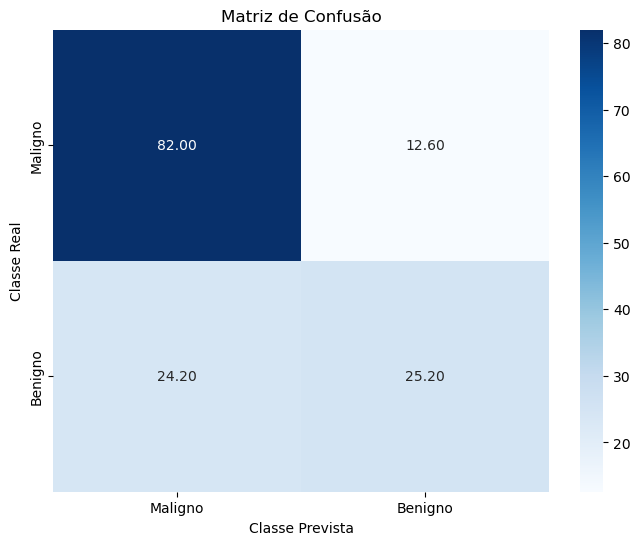


Accuracy: 0.74
Precision: 0.77
Recall: 0.87
Precision for negatives: 0.67
Recall for negatives: 0.51
F1 Score: 0.82
Average Log Loss: 0.51
ROC AUC: 0.80


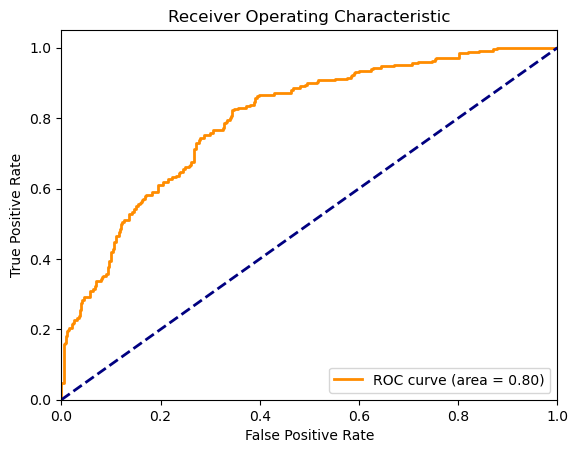

In [102]:
model_rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 9, n_estimators = 100)
X_train_rf = np.load('X_train_rf.npy')
X_train_rf = pd.DataFrame(X_train_rf)

conf_matrices = []
y_pred_proba_list = []
y_test_list = []
log_losses = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for train_index, test_index in skf.split(X_train_rf, y_train):
    X_train_fold, X_test_fold = X_train_rf.iloc[train_index], X_train_rf.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_rf.fit(X_train_fold, y_train_fold)
    y_pred_fold = model_rf.predict(X_test_fold)
    y_pred_proba_fold = model_rf.predict_proba(X_test_fold)[:, 1]
    
    conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))
    y_pred_proba_list.append(y_pred_proba_fold)
    y_test_list.append(y_test_fold)
    log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))
    
conf_matrix = np.average(conf_matrices, axis=0)
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Maligno', 'Benigno'], columns=['Maligno', 'Benigno'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()
print()

TP, FN, FP, TN = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
precision_neg = TN / (TN + FN)
recall_neg = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)
avg_log_loss = np.mean(log_losses)

y_test_combined = np.concatenate(y_test_list)
y_pred_proba_combined = np.concatenate(y_pred_proba_list)
fpr, tpr, _ = roc_curve(y_test_combined, y_pred_proba_combined)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision for negatives: {precision_neg:.2f}")
print(f"Recall for negatives: {recall_neg:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Average Log Loss: {avg_log_loss:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Execução de Random Forest com fine tuning e X_train retirado do PCA baseado no recall

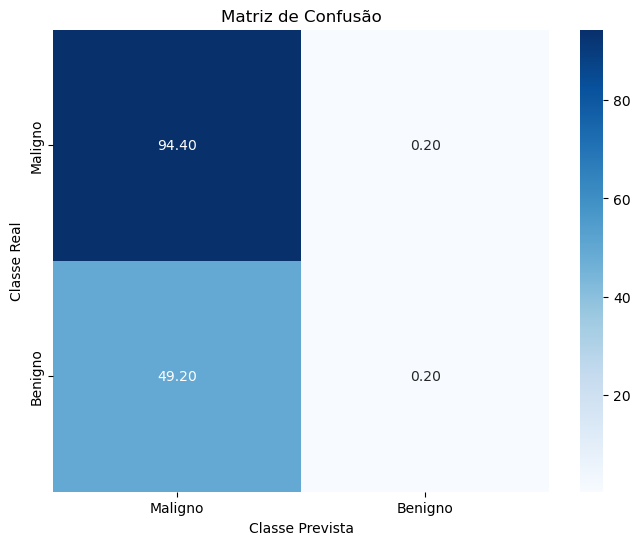


Accuracy: 0.66
Precision: 0.66
Recall: 1.00
Precision for negatives: 0.50
Recall for negatives: 0.00
F1 Score: 0.79
Average Log Loss: 0.64
ROC AUC: 0.50


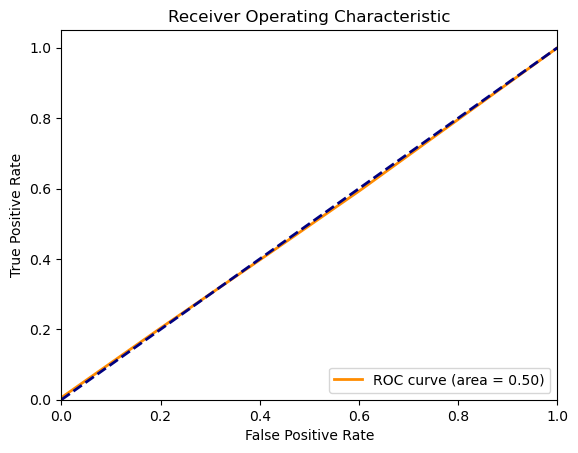

In [99]:
model_rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 9, n_estimators = 100)
X_train_rf2 = np.load('X_train_rf2.npy')
X_train_rf2 = pd.DataFrame(X_train_rf2)

conf_matrices = []
y_pred_proba_list = []
y_test_list = []
log_losses = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for train_index, test_index in skf.split(X_train_rf2, y_train):
    X_train_fold, X_test_fold = X_train_rf2.iloc[train_index], X_train_rf2.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_rf.fit(X_train_fold, y_train_fold)
    y_pred_fold = model_rf.predict(X_test_fold)
    y_pred_proba_fold = model_rf.predict_proba(X_test_fold)[:, 1]
    
    conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))
    y_pred_proba_list.append(y_pred_proba_fold)
    y_test_list.append(y_test_fold)
    log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))
    
conf_matrix = np.average(conf_matrices, axis=0)
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Maligno', 'Benigno'], columns=['Maligno', 'Benigno'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()
print()

TP, FN, FP, TN = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
precision_neg = TN / (TN + FN)
recall_neg = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)
avg_log_loss = np.mean(log_losses)

y_test_combined = np.concatenate(y_test_list)
y_pred_proba_combined = np.concatenate(y_pred_proba_list)
fpr, tpr, _ = roc_curve(y_test_combined, y_pred_proba_combined)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision for negatives: {precision_neg:.2f}")
print(f"Recall for negatives: {recall_neg:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Average Log Loss: {avg_log_loss:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Execução de Random Forest com fine tuning e X_train retirado do PCA baseado no balanceamento entre acuuracy e recall

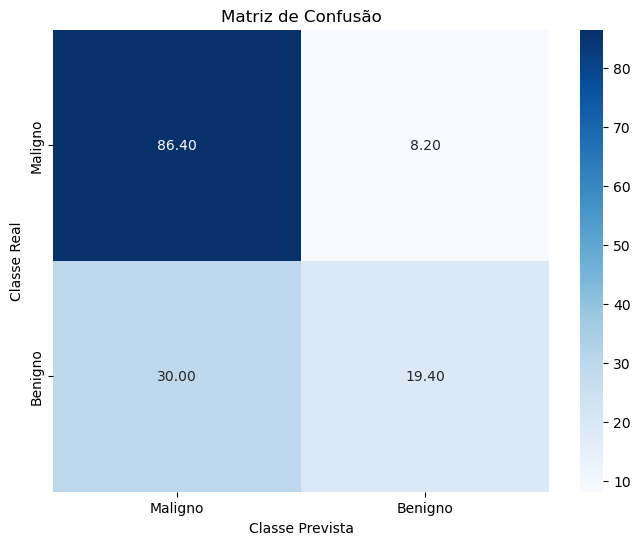


Accuracy: 0.73
Precision: 0.74
Recall: 0.91
Precision for negatives: 0.70
Recall for negatives: 0.39
F1 Score: 0.82
Average Log Loss: 0.53
ROC AUC: 0.79


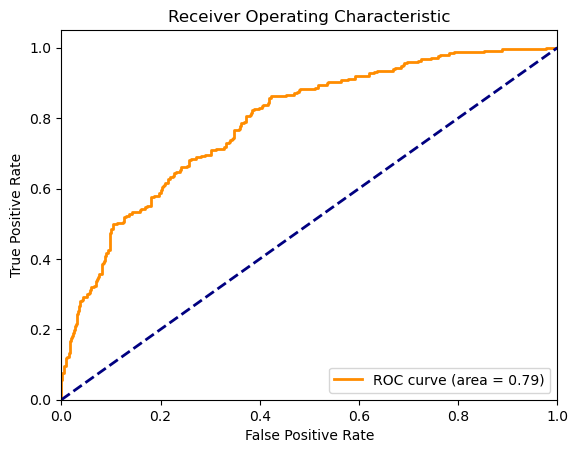

In [100]:
model_rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 9, n_estimators = 100)
X_train_rf3 = np.load('X_train_rf3.npy')
X_train_rf3 = pd.DataFrame(X_train_rf3)

conf_matrices = []
y_pred_proba_list = []
y_test_list = []
log_losses = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for train_index, test_index in skf.split(X_train_rf3, y_train):
    X_train_fold, X_test_fold = X_train_rf3.iloc[train_index], X_train_rf3.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_rf.fit(X_train_fold, y_train_fold)
    y_pred_fold = model_rf.predict(X_test_fold)
    y_pred_proba_fold = model_rf.predict_proba(X_test_fold)[:, 1]
    
    conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))
    y_pred_proba_list.append(y_pred_proba_fold)
    y_test_list.append(y_test_fold)
    log_losses.append(log_loss(y_test_fold, y_pred_proba_fold))
    
conf_matrix = np.average(conf_matrices, axis=0)
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Maligno', 'Benigno'], columns=['Maligno', 'Benigno'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()
print()

TP, FN, FP, TN = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
precision_neg = TN / (TN + FN)
recall_neg = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)
avg_log_loss = np.mean(log_losses)

y_test_combined = np.concatenate(y_test_list)
y_pred_proba_combined = np.concatenate(y_pred_proba_list)
fpr, tpr, _ = roc_curve(y_test_combined, y_pred_proba_combined)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision for negatives: {precision_neg:.2f}")
print(f"Recall for negatives: {recall_neg:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Average Log Loss: {avg_log_loss:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Emsembles

Modelo do Esemble entre XGBoost e SVM

In [132]:
ensemble_model = VotingClassifier(estimators=[('xgb', model_xgb), ('svm', model_svm)], voting='soft')
conf_matrices = []

for train_index, test_index in skf.split(X_train_xgb, y_train):
    ensemble_model.fit(X_train_xgb, y_train)
    y_pred = ensemble_model.predict(X_test_xgb)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

conf_matrix = np.average(conf_matrices, axis=0)

df_conf_matrix = pd.DataFrame(conf_matrix, index=['Maligno', 'Benigno'], columns=['Prev: Maligno', 'Prev: Benigno'])
print("Confusion Matrix:")
print(df_conf_matrix)

Confusion Matrix:
         Prev: Maligno  Prev: Benigno
Maligno          172.4            9.6
Benigno           30.8           79.2


In [133]:
ensemble_model = VotingClassifier(estimators=[('xgb', model_xgb), ('svm', model_svm)], voting='soft')
conf_matrices = []

for train_index, test_index in skf.split(X_train_svm, y_train):
    ensemble_model.fit(X_train_svm, y_train)
    y_pred = ensemble_model.predict(X_test_svm)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

conf_matrix = np.average(conf_matrices, axis=0)

df_conf_matrix = pd.DataFrame(conf_matrix, index=['Maligno', 'Benigno'], columns=['Prev: Maligno', 'Prev: Benigno'])
print("Confusion Matrix:")
print(df_conf_matrix)

NameError: name 'X_test_svm' is not defined